In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from numpy.lib.shape_base import vsplit

# Lire l'image
image_path = '../img.jfif'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img[:] = img[:] / 2
#cv2.imwrite("img2.jfif",img)

# Vérifier si l'image est null
if img is None:
    print("Error : the image can't be loaded, check the path")
    exit(0)



imgNorm= np.zeros(img.shape,np.uint8)

h,w= img.shape
min = 255
max = 0

for y in range(h):
        for x in range(w):
                if img[y,x] > max:
                        max = img[y,x]
                if img[y,x] < min:
                        min = img[y,x]

for y in range(h):
        for x in range(w):
                imgNorm[y,x] = (( img[y,x] - min ) / (max - min) ) *255

print(min)
print(max)



0
127


In [12]:
cv2.imshow("Image Source ", img)

cv2.imshow("Image Normalized", imgNorm)

cv2.waitKey(0)

cv2.destroyAllWindows()

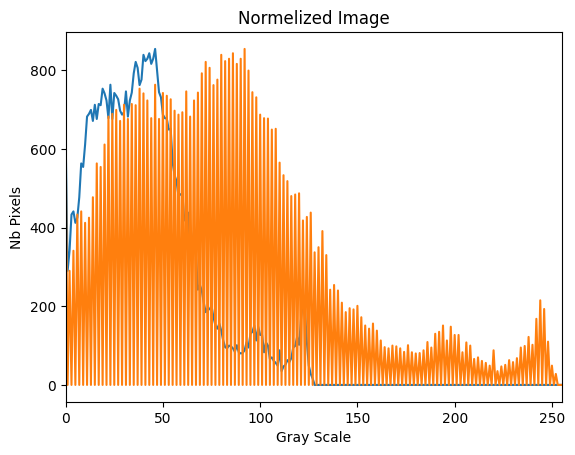

In [16]:
histo1 = np.zeros((256,1),np.uint16) #np.uint16 depend de la taille de l'image 

for y in range(h):
        for x in range(w):
                histo1[img[y,x],0] +=1

histo2 = cv2.calcHist([imgNorm],[0],None,[256],[0,255])

plt.figure()
plt.title("Normelized Image")
plt.xlabel("Gray Scale")
plt.ylabel("Nb Pixels")
plt.plot(histo1)
plt.plot(histo2)
plt.xlim([0,255])
plt.show()